In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Assessing

In [4]:
df= pd.read_csv("Product Positioning.csv")

In [5]:
df

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [12]:
df.describe()

,Product ID,Price,Competitor's Price,Sales Volume
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,154899.862000,28.020010,25.550110,1769.311000
std,25795.563607,13.067876,13.156466,718.386603
min,110033.000000,5.060000,0.720000,507.000000
25%,133164.500000,16.917500,14.277500,1136.500000
50%,154694.500000,28.680000,26.145000,1791.500000
75%,176954.250000,39.332500,37.125000,2363.750000
max,199976.000000,49.980000,49.850000,2999.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [8]:
df.isna().sum()

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [9]:
df.head(13)

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
5,117590,End-cap,34.50,34.34,No,Medium,Seniors,Clothing,No,2968
6,189118,Front of Store,41.11,40.15,Yes,High,College students,Clothing,Yes,952
7,182157,Aisle,15.75,12.30,No,Low,College students,Clothing,No,2421
8,141861,Aisle,30.07,26.75,Yes,High,Families,Electronics,Yes,1916
9,137121,Aisle,38.00,33.38,No,High,Families,Electronics,Yes,656


In [11]:
df.duplicated().sum()

0

# Data Wrangling

# After data assessing, I discovered that the dataset is cleaned. 
However, some of the column headings are having spaces and apostrophe. So, there is need to remove the space and apostrophe.

In [40]:
# To take care of the space on the column heading, rename
df.rename(columns={ 'Product Position':'Product_position', 'Foot Traffic':'Foot_Traffic','Consumer Demographics':'Consumer_Demographics','Product Category':'Product_Category', 'Sales Volume': 'Sales_Volume'}, inplace=True)

In [41]:
# To access "Competitor's Price", use double square brackets as seen below
column_name = "Competitor's Price"
Competitors_Price = df[column_name]

In [35]:
df

,Product ID,Product_position,Price,Competitor's Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


# Exploration Data Analysis

In [42]:
df

,Product ID,Product_position,Price,Competitor's Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [43]:
product_position_count= df.Product_position.value_counts()

In [44]:
product_position_count

End-cap           342
Aisle             340
Front of Store    318
Name: Product_position, dtype: int64

In [46]:
summary_column_product_position= df.Product_position.value_counts()
summary_column_Promotion= df.Promotion.value_counts()

print('Summary for summary_column_product_position:\n',summary_column_product_position)
print('\nsummary_column_Promotion:\n',summary_column_Promotion)

Summary for summary_column_product_position:
 End-cap           342
Aisle             340
Front of Store    318
Name: Product_position, dtype: int64

summary_column_Promotion:
 No     528
Yes    472
Name: Promotion, dtype: int64


In [47]:
cross_tab = pd.crosstab(df.Product_position, df.Promotion)


In [48]:
cross_tab

Promotion,No,Yes
Product_position,,
Aisle,171,169
End-cap,189,153
Front of Store,168,150


<AxesSubplot:xlabel='Product_position'>

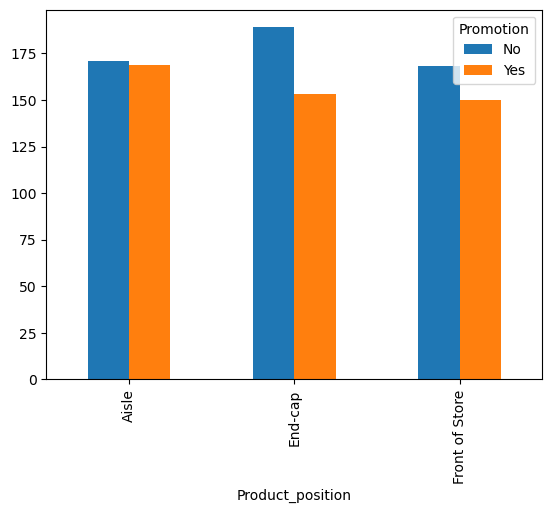

In [51]:
cross_tab.plot(kind='bar')